This Analysis is based on customer data for a hotel.
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.
The aim of this project is to predict whether a hotel booking is going to be canceled or not.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
sns.set()


In [96]:
#Importing the data
raw_data = pd.read_csv(r"C:\Users\Que\Downloads\hotel_bookings.csv")


In [5]:
#The data has 119,390 entries across 32 columns
raw_data.shape

(119390, 32)

In [ ]:
# The entry fields in the data
raw_data.info()

In [ ]:
CLEANING THE DATA

In [ ]:
# Company column will be dropped due to the high number of missing data
raw_data.drop(['company'], axis=1, inplace=True)

EXPLORING THE DATA

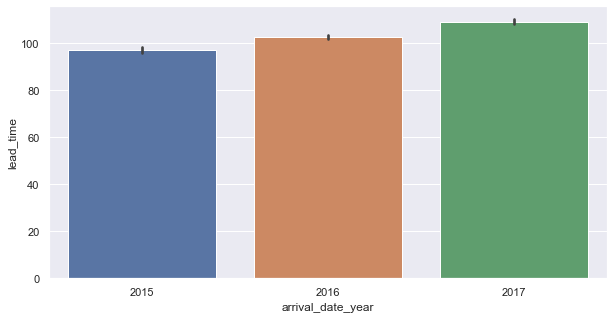

In [8]:
#Lead time for booking year on year
plt.figure(figsize=(10,5))
sns.barplot(x ='arrival_date_year', y = 'lead_time', data = raw_data)
plt.show()

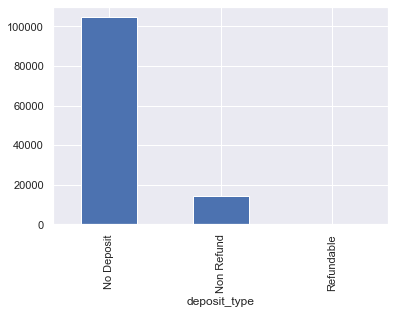

In [9]:
# Segmenting based on deposit type
raw_data.groupby(['deposit_type']).size().plot.bar()

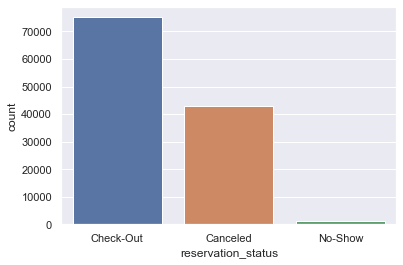

In [10]:
sns.countplot(x="reservation_status", data=raw_data)
plt.show()

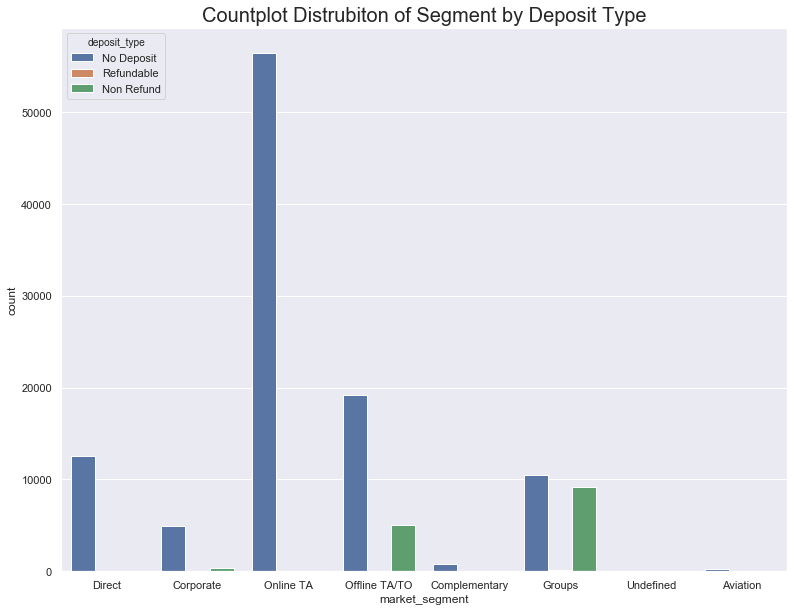

In [11]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = raw_data)

BUILDING THE MODEL

In [52]:
# Which numerical features are most important?
cancel_corr = raw_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [19]:
data = raw_data.copy()

In [170]:
# The top five most important numerical features are used as the input data (X) along with the average daily rate(adr) for the prediction of cancellation('is_canceled') which is our target.
y = raw_data['is_canceled']
X = raw_data[['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations','adr']]


In [171]:
# Standardize the input data
x1 = preprocessing.StandardScaler().fit(X).transform(X)
x1[0:5]

array([[ 2.22705112, -0.72069411, -0.25487288,  4.26010095, -0.10317951,
        -2.0150382 ],
       [ 5.9233847 , -0.72069411, -0.25487288,  5.79313122, -0.10317951,
        -2.0150382 ],
       [-0.90781407, -0.72069411, -0.25487288, -0.33898986, -0.10317951,
        -0.53093528],
       [-0.85166723, -0.72069411, -0.25487288, -0.33898986, -0.10317951,
        -0.53093528],
       [-0.84230942,  0.54066585, -0.25487288, -0.33898986, -0.10317951,
        -0.07581038]])

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [152]:
x_train.shape, y_train.shape

((95512, 7), (95512,))

In [153]:
x_test.shape, y_test.shape

((23878, 7), (23878,))

In [173]:
reg = LogisticRegression()


In [174]:
reg.fit(x_train, y_train)

C:\Users\Que\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
y_pred = reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [176]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Cancellations')
    plt.ylabel('Hotel_bookings')

    plt.show()
    plt.close()

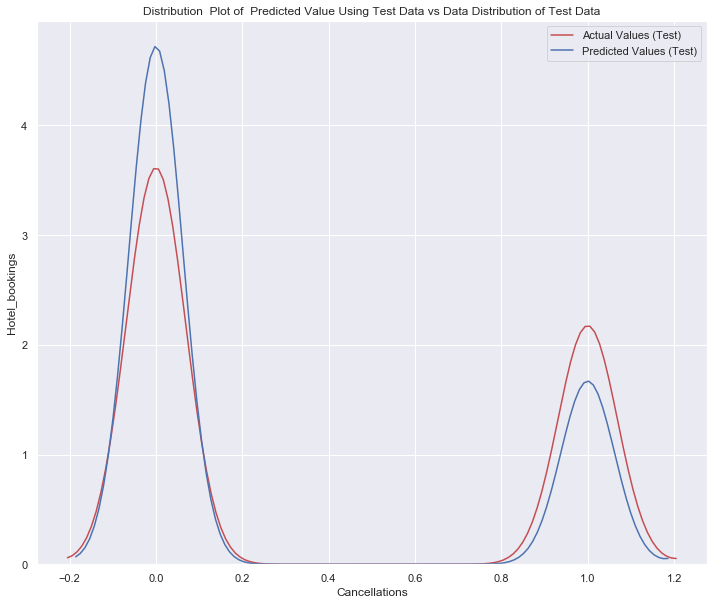

In [177]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

The plot above is a visual representation of the predictions of the created model against the actual values. Bookings not cancelled are 0 while cancelled bookings are 1

In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13023  1884]
 [ 4616  4355]]


In [189]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(reg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


This implies that the model predicts 73% of the test ran correctly.

In [180]:
# In logistic regression, coefficient are log(odds)
reg.coef_

array([[ 0.56310087, -0.57178709, -4.41706299, -0.44971844,  1.44563576,
         0.38483437]])

In [181]:
feature_name = X.columns.values

In [182]:
summary_table = pd.DataFrame(columns=['Feature_name'], data=feature_name)
summary_table['coefficient'] = np.transpose(reg.coef_)


In [183]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature_name,coefficient
0,Intercept,-1.620975
1,lead_time,0.563101
2,total_of_special_requests,-0.571787
3,required_car_parking_spaces,-4.417063
4,booking_changes,-0.449718
5,previous_cancellations,1.445636
6,adr,0.384834


In [184]:
summary_table['odds_ratio'] = np.exp(summary_table.coefficient)

The further away a coefficient is from zero, the bigger its importance

In [185]:
summary_table.sort_values('odds_ratio',ascending = False)


,Feature_name,coefficient,odds_ratio
5,previous_cancellations,1.445636,4.244550
1,lead_time,0.563101,1.756110
6,adr,0.384834,1.469371
4,booking_changes,-0.449718,0.637808
2,total_of_special_requests,-0.571787,0.564516
0,Intercept,-1.620975,0.197706
3,required_car_parking_spaces,-4.417063,0.012070


Intepretation


A person with a previous cancellation is 4 times likley to cancel again.
Fore one standard deviation increase in lead time, bookings is twice as likely to be cancelled.

In [190]:
#Saving the model
import pickle

In [191]:
with open('hotel_model', 'wb') as file:
    pickle.dump(reg, file)